# EDA

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import random
from statsmodels.stats import weightstats as stests

In [11]:
# Load Autism Data
%store -r autism_data
%store -r ASD_Ethnicity_df
%store -r ASD_gender_df

## Approach

Bar graph proportions of ethnicity and gender
Graph correlation color with score
Compare via z-test

## Visualization

Text(0.5,1,'Percentage of Ethnicities with ASD')

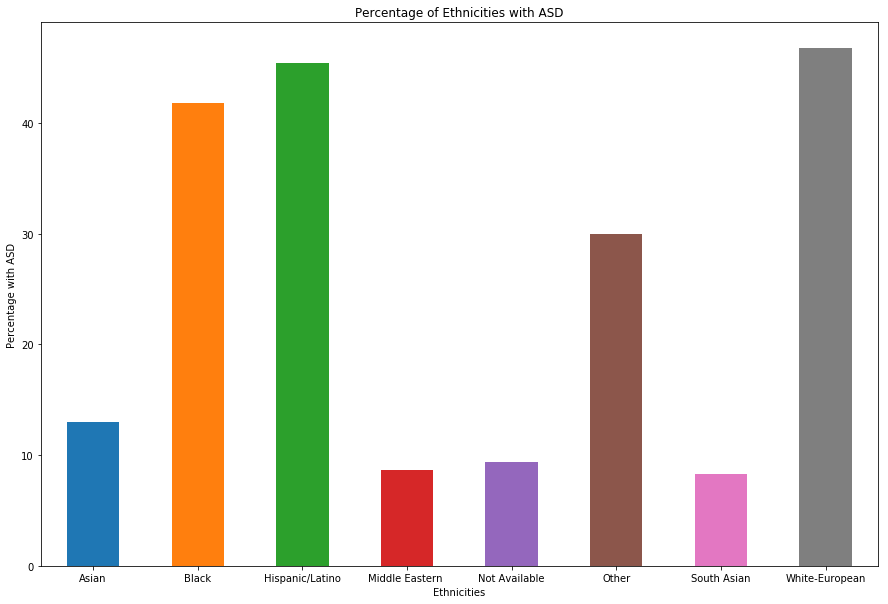

In [12]:
# Graph Percent Ethnicity
ax = ASD_Ethnicity_df.plot.bar(x='Ethnicity', y='Percentage with Autism', rot=0,figsize=(15, 10), legend=None)
ax.set_xlabel('Ethnicities')
ax.set_ylabel('Percentage with ASD')
ax.set_title('Percentage of Ethnicities with ASD')

Text(0.5,1,'Percentage Composition of Ethnicities')

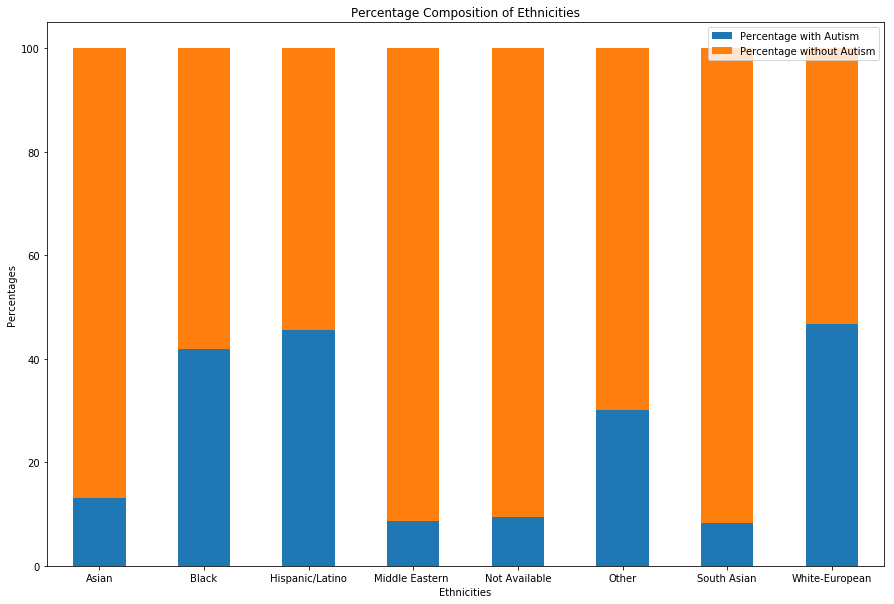

In [13]:
# Stacked Bar Ethnicity
ASD_Ethnicity_df_percentage = ASD_Ethnicity_df[['Ethnicity','Percentage with Autism','Percentage without Autism']]
ax = ASD_Ethnicity_df_percentage.plot.bar(x='Ethnicity', stacked=True, rot=0,figsize=(15, 10))
ax.set_xlabel('Ethnicities')
ax.set_ylabel('Percentages')
ax.set_title('Percentage Composition of Ethnicities')

Text(0.5,1,'Percentage of Gender with ASD')

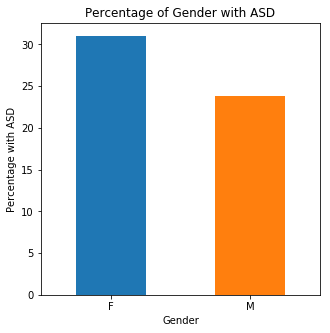

In [14]:
# Graph Percent Gender
ax = ASD_gender_df.plot.bar(x='Gender', y='Percentage with Autism', rot=0,figsize=(5, 5), legend=None)
ax.set_xlabel('Gender')
ax.set_ylabel('Percentage with ASD')
ax.set_title('Percentage of Gender with ASD')

Text(0.5,1,'Percentage Composition of Gender')

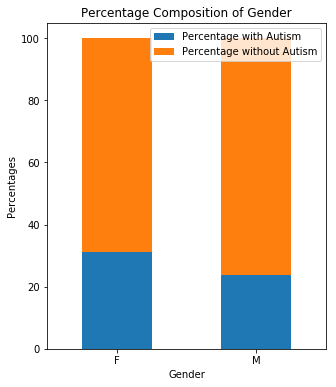

In [7]:
# Stacked Bar Gender
ASD_gender_df_percentage = ASD_gender_df[['Gender','Percentage with Autism','Percentage without Autism']]
ax = ASD_gender_df_percentage.plot.bar(x='Gender', stacked=True, rot=0,figsize=(5, 6))
ax.set_xlabel('Gender')
ax.set_ylabel('Percentages')
ax.set_title('Percentage Composition of Gender')

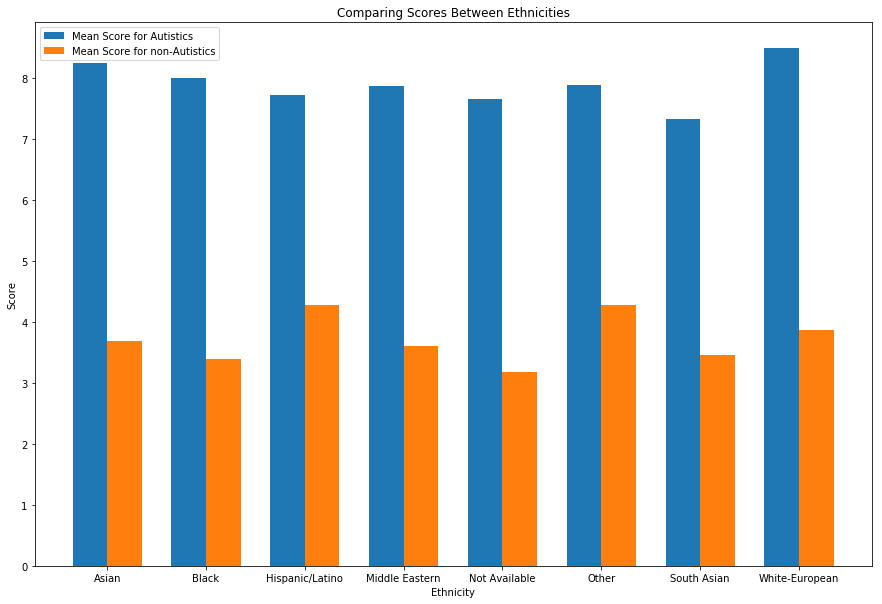

In [15]:
# Graph Mean Score Ethnicity

index = np.arange(8)
bar_width = 0.35

fig, ax = plt.subplots(figsize=(15,10))
ethnicity_score_autism_y = ax.bar(index,
                                  ASD_Ethnicity_df["Mean Autism Score for People with Autism"],
                                  bar_width, label="Mean Score for Autistics")
ethnicity_score_autism_n = ax.bar(index+bar_width,
                                  ASD_Ethnicity_df["Mean Autism Score for People without Autism"],
                                  bar_width, label="Mean Score for non-Autistics")

ax.set_xlabel('Ethnicity')
ax.set_ylabel('Score')
ax.set_title('Comparing Scores Between Ethnicities')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['Asian','Black','Hispanic/Latino','Middle Eastern',"Not Available","Other","South Asian",'White-European'])
ax.legend()

plt.show()

In [16]:
ASD_Ethnicity_df.Ethnicity

0              Asian
1              Black
2    Hispanic/Latino
3    Middle Eastern 
4      Not Available
5              Other
6        South Asian
7     White-European
Name: Ethnicity, dtype: object

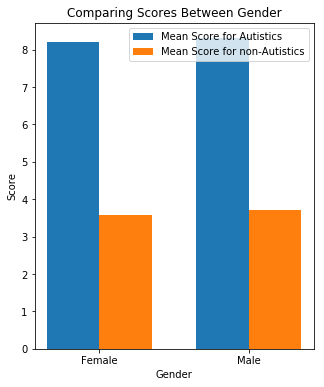

In [17]:
# Graph Scores Gender
index = np.arange(2)
bar_width = 0.35
fig, ax = plt.subplots(figsize=(5,6))
gender_score_autism_y = ax.bar(index,
                                  ASD_gender_df["Mean Autism Score for People with Autism"],
                                  bar_width, label="Mean Score for Autistics")
gender_score_autism_n = ax.bar(index+bar_width,
                                  ASD_gender_df["Mean Autism Score for People without Autism"],
                                  bar_width, label="Mean Score for non-Autistics")
ax.set_xlabel('Gender',)
ax.set_ylabel('Score')
ax.set_title('Comparing Scores Between Gender')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['Female','Male'])
ax.legend()
plt.show()

## Descriptive Statistical Analysis

### Autism Data

In [18]:
autism_data['Result'].describe()

count    686.000000
mean       4.900875
std        2.499419
min        0.000000
25%        3.000000
50%        4.000000
75%        7.000000
max       10.000000
Name: Result, dtype: float64

### Gender

In [19]:
ASD_gender_df

,Gender,Percentage with Autism,Percentage without Autism,Number of People with Autism,Number of People without Autism,Total Number of People,Mean Autism Score for People with Autism,Mean Autism Score for People without Autism,Mean Autism Score for All People
0,F,31.003040,68.996960,102,227,329,8.205882,3.568282,5.006079
1,M,23.809524,76.190476,85,272,357,8.305882,3.709559,4.803922


In [20]:
new_gender = ASD_gender_df.T
new_gender

,0,1
Gender,F,M
Percentage with Autism,31.003,23.8095
Percentage without Autism,68.997,76.1905
Number of People with Autism,102,85
Number of People without Autism,227,272
Total Number of People,329,357
Mean Autism Score for People with Autism,8.20588,8.30588
Mean Autism Score for People without Autism,3.56828,3.70956
Mean Autism Score for All People,5.00608,4.80392


In [21]:
ASD_gender_df.describe()

,Percentage with Autism,Percentage without Autism,Number of People with Autism,Number of People without Autism,Total Number of People,Mean Autism Score for People with Autism,Mean Autism Score for People without Autism,Mean Autism Score for All People
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000
mean,27.406282,72.593718,93.500000,249.500000,343.00000,8.255882,3.638920,4.905000
std,5.086584,5.086584,12.020815,31.819805,19.79899,0.070711,0.099898,0.142947
min,23.809524,68.996960,85.000000,227.000000,329.00000,8.205882,3.568282,4.803922
25%,25.607903,70.795339,89.250000,238.250000,336.00000,8.230882,3.603601,4.854461
50%,27.406282,72.593718,93.500000,249.500000,343.00000,8.255882,3.638920,4.905000
75%,29.204661,74.392097,97.750000,260.750000,350.00000,8.280882,3.674240,4.955540
max,31.003040,76.190476,102.000000,272.000000,357.00000,8.305882,3.709559,5.006079


In [22]:
autism_data.groupby(by=['Gender','ASD'])['ASD'].count()

Gender  ASD
F       NO     227
        YES    102
M       NO     272
        YES     85
Name: ASD, dtype: int64

In [23]:
autism_data.groupby(by=['Gender', 'ASD'])['Result'].mean()

Gender  ASD
F       NO     3.568282
        YES    8.205882
M       NO     3.709559
        YES    8.305882
Name: Result, dtype: float64

### Ethnicity

In [24]:
ASD_Ethnicity_df

,Ethnicity,Percentage with Autism,Percentage without Autism,Number of People with Autism,Number of People without Autism,Total Number of People,Mean Autism Score for People with Autism,Mean Autism Score for People without Autism,Mean Autism Score for All People
0,Asian,13.008130,86.991870,16,107,123,8.250000,3.682243,4.276423
1,Black,41.860465,58.139535,18,25,43,8.000000,3.400000,5.325581
2,Hispanic/Latino,45.454545,54.545455,15,18,33,7.733333,4.277778,5.848485
3,Middle Eastern,8.695652,91.304348,8,84,92,7.875000,3.607143,3.978261
4,Not Available,9.375000,90.625000,9,87,96,7.666667,3.172414,3.593750
5,Other,30.000000,70.000000,9,21,30,7.888889,4.285714,5.366667
6,South Asian,8.333333,91.666667,3,33,36,7.333333,3.454545,3.777778
7,White-European,46.781116,53.218884,109,124,233,8.495413,3.870968,6.034335


In [25]:
new_ethnicity = ASD_Ethnicity_df.T
new_ethnicity

,0,1,2,3,4,5,6,7
Ethnicity,Asian,Black,Hispanic/Latino,Middle Eastern,Not Available,Other,South Asian,White-European
Percentage with Autism,13.0081,41.8605,45.4545,8.69565,9.375,30,8.33333,46.7811
Percentage without Autism,86.9919,58.1395,54.5455,91.3043,90.625,70,91.6667,53.2189
Number of People with Autism,16,18,15,8,9,9,3,109
Number of People without Autism,107,25,18,84,87,21,33,124
Total Number of People,123,43,33,92,96,30,36,233
Mean Autism Score for People with Autism,8.25,8,7.73333,7.875,7.66667,7.88889,7.33333,8.49541
Mean Autism Score for People without Autism,3.68224,3.4,4.27778,3.60714,3.17241,4.28571,3.45455,3.87097
Mean Autism Score for All People,4.27642,5.32558,5.84848,3.97826,3.59375,5.36667,3.77778,6.03433


In [26]:
ASD_Ethnicity_df.describe()

,Percentage with Autism,Percentage without Autism,Number of People with Autism,Number of People without Autism,Total Number of People,Mean Autism Score for People with Autism,Mean Autism Score for People without Autism,Mean Autism Score for All People
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,25.438530,74.561470,23.375000,62.375000,85.750000,7.905329,3.718851,4.775160
std,17.452373,17.452373,34.948687,42.768271,69.083283,0.356745,0.403699,0.975755
min,8.333333,53.218884,3.000000,18.000000,30.000000,7.333333,3.172414,3.593750
25%,9.205163,57.241015,8.750000,24.000000,35.250000,7.716667,3.440909,3.928140
50%,21.504065,78.495935,12.000000,58.500000,67.500000,7.881944,3.644693,4.801002
75%,42.758985,90.794837,16.500000,92.000000,102.750000,8.062500,3.972670,5.487121
max,46.781116,91.666667,109.000000,124.000000,233.000000,8.495413,4.285714,6.034335


In [27]:
autism_data.groupby(by=['Ethnicity','ASD'])['ASD'].count()

Ethnicity        ASD
Asian            NO     107
                 YES     16
Black            NO      25
                 YES     18
Hispanic/Latino  NO      18
                 YES     15
Middle Eastern   NO      84
                 YES      8
Not Available    NO      87
                 YES      9
Other            NO      21
                 YES      9
South Asian      NO      33
                 YES      3
White-European   NO     124
                 YES    109
Name: ASD, dtype: int64

In [28]:
autism_data.groupby(by=['ASD'])['ASD'].count()

ASD
NO     499
YES    187
Name: ASD, dtype: int64

In [29]:
autism_data.groupby(by=['Ethnicity', 'ASD'])['Result'].mean()

Ethnicity        ASD
Asian            NO     3.682243
                 YES    8.250000
Black            NO     3.400000
                 YES    8.000000
Hispanic/Latino  NO     4.277778
                 YES    7.733333
Middle Eastern   NO     3.607143
                 YES    7.875000
Not Available    NO     3.172414
                 YES    7.666667
Other            NO     4.285714
                 YES    7.888889
South Asian      NO     3.454545
                 YES    7.333333
White-European   NO     3.870968
                 YES    8.495413
Name: Result, dtype: float64

## Inferential Statistical Analysis

### Gender Statistical Test

#### Gender Proportion Test

In [30]:
# Create Proportions For Gender
male = autism_data[autism_data.Gender=='M']
female = autism_data[autism_data.Gender=='F']

male_yes = len(male[male['ASD']=='YES'])
total_male = len(male.ASD)
male_proportion = male_yes/total_male

female_yes = len(female[female.ASD=='YES'])
total_female = len(female.ASD)
female_proportion = female_yes/total_female

diff_mean = np.abs(male_proportion-female_proportion)
pooled_proportion = (male_yes+female_yes)/(total_male+total_female)

print(female_proportion)
print(male_proportion)

0.3100303951367781
0.23809523809523808


In [31]:
# Z test to find p-value
se = np.sqrt(pooled_proportion * (1-pooled_proportion) * ((1/total_female)+(1/total_male)) )
z_stat = diff_mean / se 
p_val = stats.norm.sf(np.abs(z_stat))*2

print(("{:2.3f}".format(p_val)))

0.035


The P-Value is less than 0.05. Therefore, the data is significantly different and that there is a difference gender proportions with ASD.

#### Gender Score Test

In [32]:
male_score_y = autism_data['Result'][autism_data.ASD=='YES'][autism_data.Gender=='M']
female_score_y = autism_data['Result'][autism_data.ASD=='YES'][autism_data.Gender=='F']

In [33]:
stests.ztest(male_score_y,female_score_y)
ztest ,p_val1 = stests.ztest(male_score_y, x2=female_score_y, value=0,alternative='two-sided')
print(("{:2.3f}".format(p_val1)))

0.519


The P-Value is greater than 0.05. Therefore, the data isn't significantly different and that there is no difference in score between the genders.

### Ethnicity Statistical Tests

#### Ethnicity Proportion Test

In [34]:
print(autism_data.Ethnicity.unique())

['White-European' 'Hispanic/Latino' 'Not Available' 'Other' 'Black'
 'Asian' 'Middle Eastern ' 'South Asian']


In [35]:
# All ethnicities
all_ethnicity=[
autism_data[autism_data.Ethnicity=='Asian'],
autism_data[autism_data.Ethnicity=='Black'],
autism_data[autism_data.Ethnicity=='Hispanic/Latino'],
autism_data[autism_data.Ethnicity=='Middle Eastern'],
autism_data[autism_data.Ethnicity=='Not Available'],
autism_data[autism_data.Ethnicity=='Other'],
autism_data[autism_data.Ethnicity=='South Asian'],
autism_data[autism_data.Ethnicity=='White-European']]


In [36]:
# Compare ethnicity proportion to general population ASD
def Z_test_ethnicities_proportion(x):
    
    # Proportion for each ethnicity
    x_yes = len(x[x['ASD']=='YES'])
    x_total = len(x.ASD)
    x_proportion = x_yes/x_total
    
    # Proportion for general population 
    autism_yes = len(autism_data[autism_data['ASD']=='YES'])
    autism_total = len(autism_data.ASD)
    autism_proportion = autism_yes/autism_total
    
    diff_mean = np.abs(x_proportion-autism_proportion)
    pooled_proportion = (x_yes+autism_yes)/(x_total+autism_total)
    se = np.sqrt(pooled_proportion * (1-pooled_proportion) * ((1/x_total)+(1/autism_total)) )
    
    z_stat = diff_mean / se 
    p_val = stats.norm.sf(np.abs(z_stat))*2
    print((p_val))

In [37]:
all_ethnicity=[
autism_data[autism_data.Ethnicity=='Asian'],
autism_data[autism_data.Ethnicity=='Black'],
autism_data[autism_data.Ethnicity=='Hispanic/Latino'],
autism_data[autism_data.Ethnicity=='Middle Eastern '],
autism_data[autism_data.Ethnicity=='Not Available'],
autism_data[autism_data.Ethnicity=='Other'],
autism_data[autism_data.Ethnicity=='South Asian'],
autism_data[autism_data.Ethnicity=='White-European']]

In [38]:
for data in all_ethnicity:
    Z_test_ethnicities_proportion(data)

0.000787731573064178
0.038842199660106776
0.023115616286940095
0.00011432120853427265
0.00015244980523488168
0.7417618517856175
0.011947605980508225
3.5954275101587954e-08


When comparing ASD proportions, "Other" is the only one with a P-Value greater than 0.05. In contrast, all ethnic groups have P-values less than 0.05, indicating that they are statistically different.

#### Ethnicity Score Test

In [39]:
# All Scores per Ethnicity
all_scores = [
autism_data['Result'][autism_data.ASD=='YES'][autism_data.Ethnicity=='Asian'],
autism_data['Result'][autism_data.ASD=='YES'][autism_data.Ethnicity=='Black'],
autism_data['Result'][autism_data.ASD=='YES'][autism_data.Ethnicity=='Hispanic/Latino'],
autism_data['Result'][autism_data.ASD=='YES'][autism_data.Ethnicity=='Middle Eastern '],
autism_data['Result'][autism_data.ASD=='YES'][autism_data.Ethnicity=='Not Available'],
autism_data['Result'][autism_data.ASD=='YES'][autism_data.Ethnicity=='Other'],
autism_data['Result'][autism_data.ASD=='YES'][autism_data.Ethnicity=='South Asian'],
autism_data['Result'][autism_data.ASD=='YES'][autism_data.Ethnicity=='White-European']]

In [40]:
# Mean Population Score
mean_score = float(autism_data['Result'][autism_data.ASD=='YES'].mean())
mean_score

8.251336898395722

In [41]:
# Z-Test Function for Score
def z_test(data1,x2):
    mean_val = np.mean(data1)
    std_val = np.std(data1)
    se = std_val/np.sqrt(len(data1))
    z_value = (mean_val-x2)/se
    return z_value

In [42]:
#Performing Z_Test
for df in all_scores:
    z_stat = z_test(df,mean_score)
    p_val = stats.norm.sf(np.abs(z_stat))*2
    print("{:2.3f}".format(p_val))

0.996
0.286
0.019
0.251
0.009
0.214
0.001
0.017


Hispanic/Latino, Not Available, South Asian, and White-European are groups with mean scores less than 0.05. Therefore, their results are significantly different from the mean score and thus may show more symptoms of autism.